In [1]:
# import the essential library
import pandas as pd

In [2]:
# read titanic dataframe
df= pd.read_csv('train.csv')

In [3]:
# show the first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# get some info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# see sum of null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

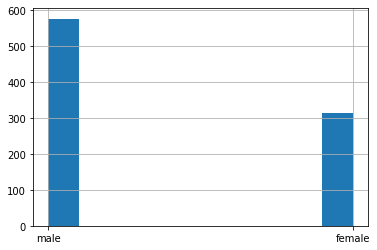

In [6]:
# plot the Sex column
df.Sex.hist()

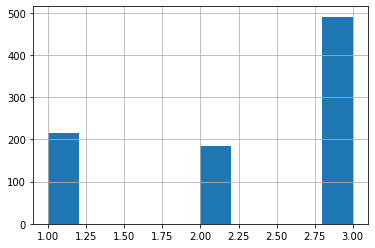

In [7]:
# plot P calss column
df.Pclass.hist()

In [8]:
# now we will get some statisical summury
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# we will deal with missing value
# for Cabin column we have 687 missing value out of 890 so it`s better to drop
df.drop('Cabin',inplace=True,axis=1)

In [10]:
# for age column we have 177 null value so i decideto impute the null value with mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
# for Embarked column we have 2 missing value so i will impute them by mode
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [12]:
# check info for null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
pclass={1:'highclass',2:'mediumclass',3:'poorclass'}

In [14]:
# map to  column pclass
df['Pclass'] = df['Pclass'].map(pclass)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,poorclass,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,highclass,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,poorclass,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,highclass,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,poorclass,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


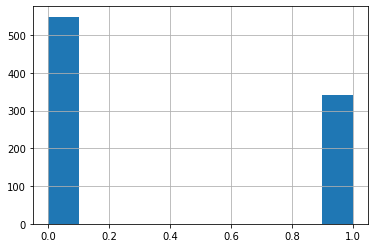

In [16]:
df.Survived.hist()

In [17]:
# drop the non useful columns like passenger id, name , ticket
non_useful_column=['PassengerId','Name','Ticket']
for i in non_useful_column:
  df.drop(i,inplace=True,axis=1)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,poorclass,male,22.0,1,0,7.2500,S
1,1,highclass,female,38.0,1,0,71.2833,C
2,1,poorclass,female,26.0,0,0,7.9250,S
3,1,highclass,female,35.0,1,0,53.1000,S
4,0,poorclass,male,35.0,0,0,8.0500,S


In [19]:
embarked = pd.get_dummies(df['Embarked'],drop_first=True)
pclass   = pd.get_dummies(df['Pclass'],drop_first=True)
sex      = pd.get_dummies(df['Sex'],drop_first=True)

In [20]:
df = pd.concat([df,embarked,pclass,sex],axis=1)


In [22]:
# now it`s time to drop categorical columns
cat=['Pclass','Sex','Embarked']
for i in cat:
  df.drop(i,inplace=True,axis=1)

In [24]:
df.to_csv('cleaning_data.csv')